In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
import time
import numpy as np
import glob
import re
import random
import torch

sys.path.insert(0, '/Data/user/panhailin/git_lab/npspy')
import npspy as nps
from npspy import npsc

In [2]:
sim = 'sim3'

In [3]:
for iteration in range(1,4):
    npsc.clean_ref_obj_by_ae_and_save(
        obj=f'../../03.results/simulation/{sim}/{sim}.pkl',
        fit_name=f'{sim}_iter{iteration}',
        output_save_dir=f'../../03.results/simulation/{sim}/iter{iteration}',
        save_reconstruction=False,
        max_iteration=iteration,
        epochs=20,
    )

Iteration 1/1 for training ShapeAwareAutoencoder...
Model ShapeAwareAutoencoder has total parameter number: 1.02 M
Epoch   0 / 20 train_loss: 0.022006 | val_loss: 0.003255 | lr: 0.001
Epoch   1 / 20 train_loss: 0.003086 | val_loss: 0.002883 | lr: 0.001
Epoch   2 / 20 train_loss: 0.002190 | val_loss: 0.002169 | lr: 0.001
Epoch   3 / 20 train_loss: 0.001830 | val_loss: 0.001722 | lr: 0.001
Epoch   4 / 20 train_loss: 0.001535 | val_loss: 0.001633 | lr: 0.001
Epoch   5 / 20 train_loss: 0.001250 | val_loss: 0.002400 | lr: 0.001
Epoch   6 / 20 train_loss: 0.001177 | val_loss: 0.000959 | lr: 0.001
Epoch   7 / 20 train_loss: 0.001006 | val_loss: 0.003256 | lr: 0.001
Epoch   8 / 20 train_loss: 0.001029 | val_loss: 0.001066 | lr: 0.001
Epoch   9 / 20 train_loss: 0.001026 | val_loss: 0.001541 | lr: 0.001
Epoch  10 / 20 train_loss: 0.001042 | val_loss: 0.001010 | lr: 0.0005
Epoch  11 / 20 train_loss: 0.000737 | val_loss: 0.000686 | lr: 0.0005
Epoch  12 / 20 train_loss: 0.000676 | val_loss: 0.00063

In [4]:
cm_dfs_dict = {}
for iteration in range(1,4):
    cm_df = npsc.get_cm_from_errors_for_sim(f'../../03.results/simulation/{sim}/iter{iteration}/{sim}_iter{iteration}_error.csv')
    cm_dfs_dict[iteration] = cm_df
cm_dfs_dict

{1: pred    target  noise
 true                 
 target   17564    436
 noise      436   1564,
 2: pred    target  noise
 true                 
 target   17863    137
 noise      137   1863,
 3: pred    target  noise
 true                 
 target   17984     16
 noise       16   1984}

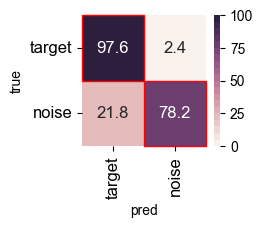

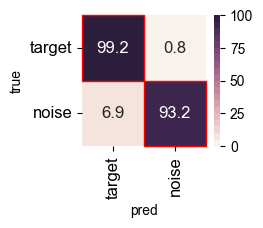

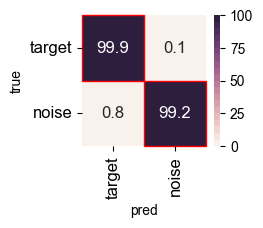

In [5]:
for iteration, cm_df in cm_dfs_dict.items():
    nps.ml.plot_cm(cm_df, figsize=(2, 1.7), annot_size=12.0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f"../../05.figures/simulation/{sim}/{sim}_iter{iteration}_cm.pdf", bbox_inches='tight')

In [6]:
metrics_dfs = []
for iteration in range(1,4):
    metrics_df = npsc.get_metrics_from_errors_for_sim(f'../../03.results/simulation/{sim}/iter{iteration}/{sim}_iter{iteration}_error.csv')
    metrics_df.index = [f'iter{iteration}']
    metrics_dfs.append(metrics_df)
metrics_dfs = pd.concat(metrics_dfs)
metrics_dfs

,accuracy,precision,recall,f1_score,jaccard_score
iter1,0.9564,0.878889,0.878889,0.878889,0.797369
iter2,0.9863,0.961944,0.961944,0.961944,0.928338
iter3,0.9984,0.995556,0.995556,0.995556,0.991175


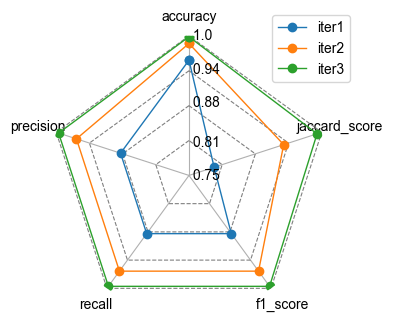

In [7]:
npsc.draw_radar_plot(metrics_dfs, y_min=0.75, legned_ncol=1, figsize=(4,4), y_tick_num=4)
plt.savefig(f'../../05.figures/simulation/{sim}/{sim}_radar_plot.pdf', bbox_inches='tight')